<a href="https://colab.research.google.com/github/sergi0gs/Marvel_vs_DC/blob/main/Marvel_vs_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this project we will try to analyse the information about the heroes of Marvel and DC comics learning about the different types of techniques that we have in Python to analyse, clean, transform and visualize data.

The information comes from these datasets in kaggle: https://www.kaggle.com/thec03u5/complete-superhero-dataset, https://www.kaggle.com/claudiodavi/superhero-set

Which was constructed using web scrapping tecniques from the next website: https://www.superherodb.com/.

Alse we use as a guide the next example maked in R from: https://cosmoduende.medium.com/dc-comics-vs-marvel-comics-an%C3%A1lisis-exploratorio-y-visualizaci%C3%B3n-de-datos-con-r-b0cf565e44e2

# **What do we want to know?**
1. How many characters are there in DC Comics and Marvel Comics?
2. What is the predominant gender in the characters of DC Comics and Marvel Comics?
3. What is the predominant race in both comics?
4.   Which has more Heroes or Villains?
5.   Realize a comparative between the character abilites of both comics.
6.   Who are the most intelligent characters?
7.   Who are the strongest characters?
8.   Who are the fastest characters?
9.   Who are the characters with more power?
10. What superpowers predominate in the characters of DC Comics and Marvel Comics?





# Data Exploration

## Import libraries

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read files

In [268]:
superhero = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Marvel_vs_DC/main/datasets/SuperheroDataset.csv')
heroes_information = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Marvel_vs_DC/main/datasets/heroes_information.csv')
super_hero_powers = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Marvel_vs_DC/main/datasets/super_hero_powers.csv')

## Data Shape

### SuperHero.csv

In [269]:
superhero.shape

(743, 29)

### heroes_information.csv

In [270]:
heroes_information.shape

(734, 11)

### super_hero_powers.csv


In [271]:
super_hero_powers.shape

(667, 168)

## Information

### SuperHero.csv

In [272]:
superhero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        743 non-null    int64  
 1   Unnamed: 0.1      743 non-null    int64  
 2   Name              743 non-null    object 
 3   Url               743 non-null    object 
 4   Intelligence      665 non-null    float64
 5   Strength          665 non-null    float64
 6   Speed             665 non-null    float64
 7   Durability        665 non-null    float64
 8   Power             665 non-null    float64
 9   Combat            665 non-null    float64
 10  Full name         743 non-null    object 
 11  Alter Egos        743 non-null    object 
 12  Aliases           743 non-null    object 
 13  Place of birth    743 non-null    object 
 14  First appearance  743 non-null    object 
 15  Creator           735 non-null    object 
 16  Alignment         743 non-null    object 
 1

In [273]:
superhero.sample(5)

,Unnamed: 0,Unnamed: 0.1,Name,Url,Intelligence,Strength,Speed,Durability,Power,Combat,Full name,Alter Egos,Aliases,Place of birth,First appearance,Creator,Alignment,Gender,Race,Height,Weight,Eye color,Hair color,Occupation,Base,Team Affiliation,Relatives,Skin color,Total Power
627,627,627,Spider-Girl,/spider-girl/10-480/,85.0,40.0,60.0,65.0,55.0,75.0,May 'Mayday' Parker,No alter egos found.,-,"New York City, New York","What If? Vol 2 #105 (February, 1998)",Marvel Comics,good,Female,Human,5'7 // 170 cm,119 lb // 54 kg,Blue,Brown,-,"New York City, New York",The Spider Society,-,NaN,380.0
459,459,459,Mister Freeze,/mister-freeze/10-742/,90.0,35.0,15.0,70.0,40.0,30.0,Victor Fries,No alter egos found.,"Mister Zero, Doctor Zero, Doctor Schimmell",-,Batman #121 (Feb. 1959),DC Comics,bad,Male,Human,6'0 // 183 cm,190 lb // 86 kg,-,-,-,-,Formerly: The Society,"Nora Fries (wife, deceased, then resurrected a...",NaN,280.0
59,59,59,Bananaman,/bananaman/10-10557/,60.0,50.0,35.0,80.0,30.0,30.0,-,No alter egos found.,Eric Twinge,-,Nutty No.1,NaN,good,Male,Human,- // 0 cm,- lb // 0 kg,-,-,-,-,No team connections added yet.,-,NaN,285.0
619,619,619,Songbird,/songbird/10-131/,90.0,40.0,30.0,45.0,55.0,60.0,Melissa Joan Gold,No alter egos found.,"Screaming Mimi, Mimi Schwartz, Margie Green","Shoshoni, Wyoming",-,Marvel Comics,good,Female,-,5'5 // 165 cm,145 lb // 65 kg,Green,Red / White,Adventurer; former criminal and wrestler,-,"A.I.M., Thunderbolts","Mimi Gold (mother), Mr. Gold (father)",NaN,320.0
119,119,119,Blizzard II,/blizzard-ii/10-619/,75.0,10.0,30.0,45.0,50.0,60.0,Donald Gill,No alter egos found.,-,"Newark, Delaware",Iron Man #223 (1987),Marvel Comics,bad,Male,-,5'9 // 175 cm,170 lb // 77 kg,Brown,Brown,Adventurer; former mercenary and professional ...,-,Formerly: National Force,-,NaN,270.0


### heroes_information.csv

In [274]:
heroes_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [275]:
heroes_information.sample(5)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
224,224,Doctor Octopus,Male,brown,Human,Brown,175.0,Marvel Comics,-,bad,110.0
508,508,Ozymandias,Male,blue,Human,Blond,-99.0,DC Comics,-,bad,-99.0
75,75,Beast Boy,Male,green,Human,Green,173.0,DC Comics,green,good,68.0
195,195,Cyclops,Male,brown,Mutant,Brown,191.0,Marvel Comics,-,good,88.0
584,584,Sebastian Shaw,Male,-,Mutant,-,-99.0,Marvel Comics,-,bad,-99.0


### super_hero_powers.csv

In [276]:
super_hero_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [277]:
super_hero_powers.sample(5)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
153,Cheetah II,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
648,Wasp,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
657,Wonder Man,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
224,Exodus,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Null Values

### SuperHero.csv

In [278]:
superhero.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Name                  0
Url                   0
Intelligence         78
Strength             78
Speed                78
Durability           78
Power                78
Combat               78
Full name             0
Alter Egos            0
Aliases               0
Place of birth        0
First appearance      0
Creator               8
Alignment             0
Gender                0
Race                  0
Height                0
Weight                0
Eye color             0
Hair color            0
Occupation            0
Base                  0
Team Affiliation      0
Relatives             0
Skin color          669
Total Power           0
dtype: int64

### heroes_information.csv

In [279]:
heroes_information.isnull().sum()


Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

### super_hero_powers.csv

In [280]:
super_hero_powers.isnull().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

In [281]:
super_hero_powers.isnull().sum().sum()

0

## Duplicates

### SuperHero.csv

In [282]:
superhero.duplicated().sum()

0

### heroes_information.csv

In [283]:
heroes_information.duplicated().sum()


0

### super_hero_powers.csv

In [284]:
super_hero_powers.duplicated().sum()

0

# Data Cleaning

## SuperHero.csv

**Step 1:** Eliminate unnecessary columns like: "Skin color","Unnamed: 0", "Unnamed: 0.1",'Url','Full name,'Alter Egos','Aliases','Place of birth','Eye color','Hair color','Occupation','Base','Team Affiliation','Relatives'


In [285]:
superhero_clean = superhero.copy(deep = True)
superhero_clean.drop(columns = ['Skin color','Unnamed: 0', 'Unnamed: 0.1','Url','Full name','Alter Egos','Aliases',
                                'Place of birth','Height','Weight','Eye color','Hair color','Occupation','Base','Team Affiliation','Relatives','First appearance'], inplace=True)
superhero_clean

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0
2,Abe Sapien,95.0,30.0,35.0,65.0,100.0,85.0,Dark Horse Comics,good,Male,Icthyo Sapien,410.0
3,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0
4,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...
738,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0
739,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0
740,Yoda,95.0,55.0,35.0,25.0,100.0,90.0,George Lucas,good,Male,Yoda's species,400.0
741,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0


**Step 2:** Filter by comics

Count the number of values in Marvel Comics and DC Comics

In [286]:
superhero_clean['Creator'].value_counts()

Marvel Comics        395
DC Comics            219
NBC - Heroes          19
Dark Horse Comics     19
George Lucas          15
Image Comics          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
ABC Studios            4
Shueisha               4
Icon Comics            4
IDW Publishing         4
Wildstorm              4
Mattel                 2
Sony Pictures          2
Microsoft              1
J. R. R. Tolkien       1
J. K. Rowling          1
South Park             1
Rebellion              1
Universal Studios      1
Hanna-Barbera          1
Ian Fleming            1
Name: Creator, dtype: int64

Marvale Comics + DC Comics = 614

In [287]:
filter_sh = (superhero_clean['Creator'] == 'Marvel Comics') | (superhero_clean['Creator'] == 'DC Comics') 
superhero_clean = superhero_clean[filter_sh]
superhero_clean

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0
3,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0
4,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0
5,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
737,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0
738,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0
739,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0
741,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0


We can see that the result is 614 rows so we do it well.

## heroes_information.csv

**Step 1:** Eliminate 'Unnamed: 0','Hair color','Height','Skin color','Height','Weight'


In [288]:
heroes_information_clean = heroes_information.copy(deep = True)
heroes_information_clean.drop(columns = ['Unnamed: 0','Eye color','Hair color','Height','Skin color','Height','Weight'], inplace = True)
heroes_information_clean

,name,Gender,Race,Publisher,Alignment
0,A-Bomb,Male,Human,Marvel Comics,good
1,Abe Sapien,Male,Icthyo Sapien,Dark Horse Comics,good
2,Abin Sur,Male,Ungaran,DC Comics,good
3,Abomination,Male,Human / Radiation,Marvel Comics,bad
4,Abraxas,Male,Cosmic Entity,Marvel Comics,bad
...,...,...,...,...,...
729,Yellowjacket II,Female,Human,Marvel Comics,good
730,Ymir,Male,Frost Giant,Marvel Comics,good
731,Yoda,Male,Yoda's species,George Lucas,good
732,Zatanna,Female,Human,DC Comics,good


**Step 2** : Filter by comics.


In [289]:
filter_hi = (heroes_information_clean['Publisher'] == 'Marvel Comics') | (heroes_information_clean['Publisher'] == 'DC Comics') 
heroes_information_clean = heroes_information_clean[filter_hi]
heroes_information_clean

,name,Gender,Race,Publisher,Alignment
0,A-Bomb,Male,Human,Marvel Comics,good
2,Abin Sur,Male,Ungaran,DC Comics,good
3,Abomination,Male,Human / Radiation,Marvel Comics,bad
4,Abraxas,Male,Cosmic Entity,Marvel Comics,bad
5,Absorbing Man,Male,Human,Marvel Comics,bad
...,...,...,...,...,...
728,Yellowjacket,Male,Human,Marvel Comics,good
729,Yellowjacket II,Female,Human,Marvel Comics,good
730,Ymir,Male,Frost Giant,Marvel Comics,good
732,Zatanna,Female,Human,DC Comics,good


**Step 3:** Check the filter

In [290]:
heroes_information_clean['Publisher'].unique()

array(['Marvel Comics', 'DC Comics'], dtype=object)

## super_hero_powers.csv



We need to transform the data in a long format to visualize it better.

**Step 1:** Obtain all the columns as a list

In [291]:
super_hero_powers_clean = super_hero_powers.copy(deep = True)
shpc_columns = list(super_hero_powers_clean.columns)
shpc_columns

['hero_names',
 'Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Trans

**Step 2:** Eliminate the first value

In [292]:
shpc_columns.remove('hero_names')
shpc_columns


['Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Transport',
 'Fire C

**Step 3:** Melt the data to transform it to a long format

In [293]:
sphc_melt = pd.melt(super_hero_powers_clean, id_vars='hero_names',value_vars = shpc_columns)
sphc_melt

,hero_names,variable,value
0,3-D Man,Agility,True
1,A-Bomb,Agility,False
2,Abe Sapien,Agility,True
3,Abin Sur,Agility,False
4,Abomination,Agility,False
...,...,...,...
111384,Yellowjacket II,Omniscient,False
111385,Ymir,Omniscient,False
111386,Yoda,Omniscient,False
111387,Zatanna,Omniscient,False


**Step 4:** Filter with True Value

In [294]:
filter_sphc = sphc_melt['value'] == True
sphc_melt = sphc_melt[filter_sphc]
sphc_melt

,hero_names,variable,value
0,3-D Man,Agility,True
2,Abe Sapien,Agility,True
12,Ajax,Agility,True
14,Alex Mercer,Agility,True
16,Alien,Agility,True
...,...,...,...
109472,Bizarro-Girl,Vision - Cryo,True
110443,Man of Miracles,Omnipresent,True
110510,One-Above-All,Omnipresent,True
111110,Man of Miracles,Omniscient,True


**Step 5:** Group by "hero_names"

In [295]:
sphc_melt.groupby('hero_names')['variable']

In [296]:
sphc_melt = sphc_melt.groupby('hero_names')['variable'].apply(list).reset_index()
sphc_melt

,hero_names,variable
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


**Step 6:** Change name columns "variable" to "super_power"



In [297]:
sphc_melt.rename(columns={'variable':'super_powers'},inplace=True)
sphc_melt

,hero_names,super_powers
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


## Cross the dataframes in only one

### Join SuperHero and Heroes information

Left: SuperHero (614 rows)

Right: heroes_information (603 rows)

Use Left Join because superhero_clean have more rows

In [298]:
data_join = pd.merge(superhero_clean, heroes_information_clean, how = 'left', left_on= 'Name', right_on= 'name')
data_join

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment_x,Gender_x,Race_x,Total Power,name,Gender_y,Race_y,Publisher,Alignment_y
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,NaN,NaN,NaN,NaN,NaN
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,A-Bomb,Male,Human,Marvel Comics,good
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,Abin Sur,Male,Ungaran,DC Comics,good
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,Abomination,Male,Human / Radiation,Marvel Comics,bad
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,Abraxas,Male,Cosmic Entity,Marvel Comics,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,Yellowjacket,Male,Human,Marvel Comics,good
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,Yellowjacket II,Female,Human,Marvel Comics,good
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,Ymir,Male,Frost Giant,Marvel Comics,good
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,Zatanna,Female,Human,DC Comics,good


#### Check null values and drop unnecessary columns

In [299]:
data_join.isnull().sum()

Name             0
Intelligence    66
Strength        66
Speed           66
Durability      66
Power           66
Combat          66
Creator          0
Alignment_x      0
Gender_x         0
Race_x           0
Total Power      0
name            18
Gender_y        18
Race_y          18
Publisher       18
Alignment_y     18
dtype: int64

Drop: 'name','Gender_y','Race_y','Publisher','Alignment_y'





In [300]:
data_join.drop(columns=['name','Gender_y','Race_y','Publisher','Alignment_y'], inplace=True)
data_join

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment_x,Gender_x,Race_x,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0


Change the name of columns with "_x" in its names.

In [301]:
data_join.rename(columns={'Alignment_x':'Alignment','Gender_x':'Gender','Race_x':'Race'}, inplace= True)
data_join

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0


### Left join between "data_join" and "super_hero_powers_clean"

Left: data_join (653 rows)

Right: shpc_melt (667 rows)

In [302]:
data_join_2 = pd.merge(data_join,sphc_melt,how='left',left_on='Name',right_on='hero_names')
data_join_2

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,hero_names,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,Abin Sur,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,Abraxas,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,Yellowjacket,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


#### Check null values and drop unnecessary columns

In [303]:
data_join_2.isnull().sum()

Name             0
Intelligence    66
Strength        66
Speed           66
Durability      66
Power           66
Combat          66
Creator          0
Alignment        0
Gender           0
Race             0
Total Power      0
hero_names      89
super_powers    89
dtype: int64

Compare between Name and null values of hero_names

In [304]:
data_join_2[data_join_2['hero_names'].isnull()]

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,hero_names,super_powers
7,Agent 13,80.0,40.0,45.0,50.0,45.0,85.0,Marvel Comics,good,Female,-,345.0,NaN,NaN
12,Alfred Pennyworth,85.0,10.0,20.0,10.0,10.0,55.0,DC Comics,good,Male,Human,190.0,NaN,NaN
36,Arsenal,80.0,55.0,60.0,60.0,65.0,85.0,DC Comics,good,Male,Human,405.0,NaN,NaN
60,Batgirl III,80.0,65.0,70.0,70.0,65.0,90.0,DC Comics,good,Female,-,440.0,NaN,NaN
62,Batgirl V,NaN,NaN,NaN,NaN,NaN,NaN,DC Comics,good,Female,-,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,White Queen,80.0,45.0,45.0,70.0,65.0,45.0,Marvel Comics,good,Female,-,350.0,NaN,NaN
637,Wiz Kid,NaN,NaN,NaN,NaN,NaN,NaN,Marvel Comics,good,-,-,0.0,NaN,NaN
643,Wondra,NaN,NaN,NaN,NaN,NaN,NaN,Marvel Comics,good,Female,-,0.0,NaN,NaN
644,Wyatt Wingfoot,60.0,10.0,15.0,5.0,5.0,60.0,Marvel Comics,good,Male,-,155.0,NaN,NaN


Drop "hero_names"


In [305]:
data_join_2.drop(columns=['hero_names'], inplace = True)
data_join_2

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


Replace null values of "super_powers" by a "Empty"

In [306]:
data_join_2.fillna(data_join_2.median(),inplace = True)
data_join_2

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


Check null values

In [307]:
data_join_2.isnull().sum()

Name             0
Intelligence     0
Strength         0
Speed            0
Durability       0
Power            0
Combat           0
Creator          0
Alignment        0
Gender           0
Race             0
Total Power      0
super_powers    89
dtype: int64

Change null values of superpowers for "Empty"

In [308]:
data_join_2.fillna("Empty",inplace = True)
data_join_2

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


Check null values

In [309]:
data_join_2.isnull().sum()

Name            0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Creator         0
Alignment       0
Gender          0
Race            0
Total Power     0
super_powers    0
dtype: int64

### Our final dataframe

In [310]:
final_df = data_join_2.copy(deep=True)
final_df

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


# Questions

## Q1. How many heroes are there in DC Comics and Marvel Comics?


In [311]:
q1 = final_df['Creator']
q1.value_counts()

Marvel Comics    419
DC Comics        234
Name: Creator, dtype: int64

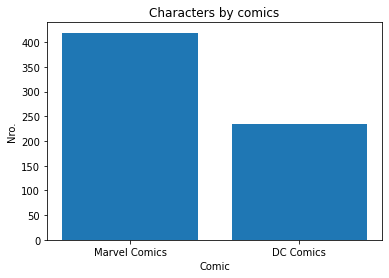

In [312]:
fig,ax = plt.subplots()
ax.bar(q1.value_counts().index, q1.value_counts())
ax.set_title('Characters by comics')
ax.set_xlabel('Comic')
ax.set_ylabel('Nro.')

plt.show()

## Q2. What is the predominant gender in the characters of DC Comics and Marvel Comics?


Use only "Creator" and "Gender" columns

In [313]:
q2 = final_df.loc[:,['Creator','Gender']]
q2

,Creator,Gender
0,Marvel Comics,Male
1,Marvel Comics,Male
2,DC Comics,Male
3,Marvel Comics,Male
4,Marvel Comics,Male
...,...,...
648,Marvel Comics,Male
649,Marvel Comics,Female
650,Marvel Comics,Male
651,DC Comics,Female


Check the value_counts()

In [314]:
q2.value_counts()

Creator        Gender
Marvel Comics  Male      277
DC Comics      Male      166
Marvel Comics  Female    115
DC Comics      Female     67
Marvel Comics  -          27
DC Comics      -           1
dtype: int64

We see that there are 28 values whit this 👉 ' - '. It means that there are characters which can not be considered a Gender. Remember that the Gender depends of the Race so in order to not confused you we are going to change it by 'Without Gender"

In [315]:
q2.replace({'-':'Without Gender'}, inplace=True)
q2_values = q2.value_counts()
q2_values= q2_values.reset_index()
q2_values

,Creator,Gender,0
0,Marvel Comics,Male,277
1,DC Comics,Male,166
2,Marvel Comics,Female,115
3,DC Comics,Female,67
4,Marvel Comics,Without Gender,27
5,DC Comics,Without Gender,1


Change '0' by 'Values'

In [316]:
q2_values.rename(columns={0:'Values'},inplace = True)
q2_values

,Creator,Gender,Values
0,Marvel Comics,Male,277
1,DC Comics,Male,166
2,Marvel Comics,Female,115
3,DC Comics,Female,67
4,Marvel Comics,Without Gender,27
5,DC Comics,Without Gender,1


Create a Pivot Table: 

values='Values.

index='Creator'.

columns='Gender'



In [317]:
q2_pivot_table = q2_values.pivot_table(values='Values',index='Creator',columns='Gender')
q2_pivot_table

Gender,Female,Male,Without Gender
Creator,,,
DC Comics,67,166,1
Marvel Comics,115,277,27


### Plot the pivot table

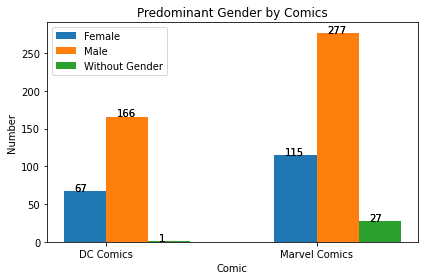

In [318]:
labels = list(q2_pivot_table.index)
female_means = list(q2_pivot_table['Female'])
male_means = list(q2_pivot_table['Male'])
without_gender_means = list(q2_pivot_table['Without Gender'])

x=np.arange(len(labels))
width=0.2

fig, ax = plt.subplots()

female_bar = ax.bar(x-width/2 , female_means, width, label = 'Female')
male_bar = ax.bar(x+width/2, male_means ,width, label = 'Male')
without_gender_bar = ax.bar(x+3*(width/2), without_gender_means ,width, label = 'Without Gender')

ax.set_title('Predominant Gender by Comics')
ax.set_xlabel('Comic')
ax.set_ylabel('Number')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bar):
  width=0.2
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x()+0.05, p.get_height()))
    
autolabel(female_bar)
autolabel(male_bar)

fig.tight_layout()
plt.show()

## Q3. What is the predominant race in both comics?
Use "Creator" and "Race" columns



In [319]:
q3_df = final_df.loc[:,['Creator','Race']]
q3_df

,Creator,Race
0,Marvel Comics,-
1,Marvel Comics,Human
2,DC Comics,Ungaran
3,Marvel Comics,Human / Radiation
4,Marvel Comics,Cosmic Entity
...,...,...
648,Marvel Comics,Human
649,Marvel Comics,Human
650,Marvel Comics,Frost Giant
651,DC Comics,Human


Replace '-' by 'Without Race'

In [320]:
q3_df.replace({'-':'Witout Race'}, inplace=True)
q3_df = q3_df.value_counts().reset_index()
q3_df


,Creator,Race,0
0,Marvel Comics,Witout Race,180
1,DC Comics,Human,100
2,Marvel Comics,Human,99
3,DC Comics,Witout Race,74
4,Marvel Comics,Mutant,56
...,...,...,...
59,Marvel Comics,Human-Spartoi,1
60,DC Comics,Zombie,1
61,Marvel Comics,Human-Inhuman,1
62,Marvel Comics,Clone,1


Rename '0' by 'values'

In [321]:
q3_df.rename(columns={0:'Values'}, inplace=True)
q3_df

,Creator,Race,Values
0,Marvel Comics,Witout Race,180
1,DC Comics,Human,100
2,Marvel Comics,Human,99
3,DC Comics,Witout Race,74
4,Marvel Comics,Mutant,56
...,...,...,...
59,Marvel Comics,Human-Spartoi,1
60,DC Comics,Zombie,1
61,Marvel Comics,Human-Inhuman,1
62,Marvel Comics,Clone,1


Filter and separate in two dataframes by comics

In [322]:
q3_marvel = q3_df[q3_df['Creator'] == 'Marvel Comics']
q3_dc = q3_df[q3_df['Creator'] == 'DC Comics']

### Plot

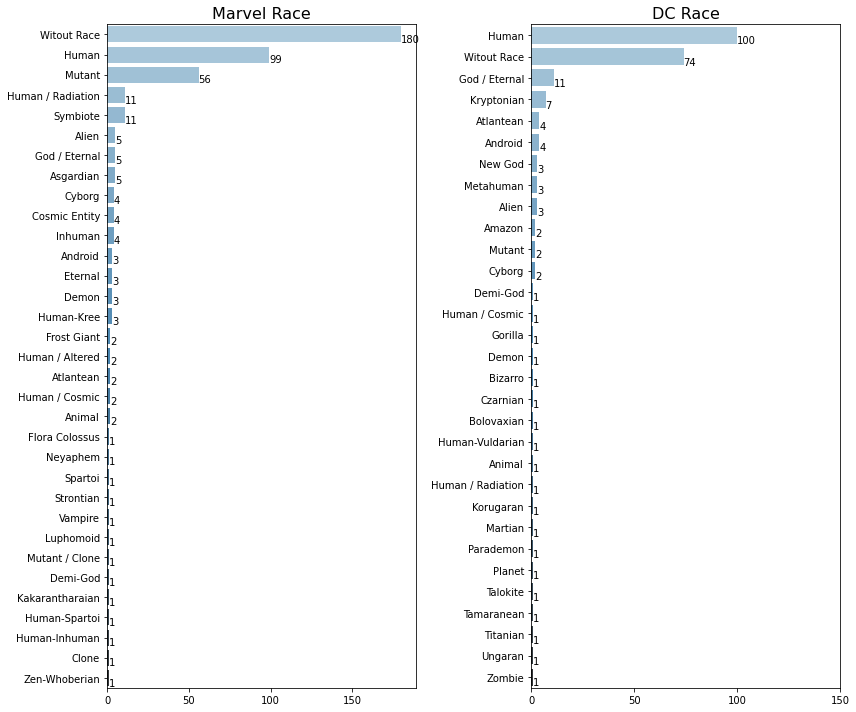

In [323]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(12,10)

ax1_values = list(q3_marvel['Values'])
ax1_labels = list(q3_marvel['Race'])

sns.barplot(x = ax1_values, y=ax1_labels , ax = ax1, orient = 'h', palette='Blues_d')
ax1.set_xticks(range(0,200,50))

ax1.set_title('Marvel Race',fontsize=16) 

for text_n, rect in zip(ax1_values, ax1.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy() 
    ax1.text(x = x + width , 
             y = y + height , 
             s =text_n)

###

ax2_values = list(q3_dc['Values'])
ax2_labels = list(q3_dc['Race'])

sns.barplot(x = ax2_values, y=ax2_labels , ax = ax2, orient = 'h', palette='Blues_d')
ax2.set_xticks(range(0,200,50))

ax2.set_title('DC Race',fontsize=16) 

for text_n_2, rect_2 in zip(ax2_values, ax2.patches):
    #width = rect_2.xy
    width, height = rect_2.get_width(), rect_2.get_height()
    x_2, y_2 = rect_2.get_xy() 
    ax2.text(x = x_2 + width , 
             y = y_2 + height , 
             s =text_n_2)

fig.tight_layout()
plt.show()


## Q4.Which has more Heroes or Villains?

**Step 1:** Use columns "Alignment" and "Creator"

In [324]:
q4_df = final_df.loc[:,['Creator','Alignment']]
q4_df

,Creator,Alignment
0,Marvel Comics,good
1,Marvel Comics,good
2,DC Comics,good
3,Marvel Comics,bad
4,Marvel Comics,bad
...,...,...
648,Marvel Comics,good
649,Marvel Comics,good
650,Marvel Comics,good
651,DC Comics,good


**Step 2:** Check the value_counts()

In [325]:
q4_df.value_counts()

Creator        Alignment
Marvel Comics  good         285
DC Comics      good         157
Marvel Comics  bad          121
DC Comics      bad           59
               neutral       17
Marvel Comics  neutral       10
               -              3
DC Comics      -              1
dtype: int64

It's Ok. Rememer that the values in "blank" in "Creator" is the same of the value which is above of it.

**Step 3:** Replace "good" by "Hero" , "bad" by "Villains" ad '-' by 'Doubt'

In [326]:
q4_df.replace({'good':'Hero','bad':'Villain','-':'Doubt'}, inplace=True)
q4_df

,Creator,Alignment
0,Marvel Comics,Hero
1,Marvel Comics,Hero
2,DC Comics,Hero
3,Marvel Comics,Villain
4,Marvel Comics,Villain
...,...,...
648,Marvel Comics,Hero
649,Marvel Comics,Hero
650,Marvel Comics,Hero
651,DC Comics,Hero


**Step 4:** Compare with the value counts. Then make it in a dataframe

In [327]:
q4_df.value_counts()

Creator        Alignment
Marvel Comics  Hero         285
DC Comics      Hero         157
Marvel Comics  Villain      121
DC Comics      Villain       59
               neutral       17
Marvel Comics  neutral       10
               Doubt          3
DC Comics      Doubt          1
dtype: int64

It's Ok

In [328]:
q4_df=q4_df.value_counts().reset_index()
q4_df

,Creator,Alignment,0
0,Marvel Comics,Hero,285
1,DC Comics,Hero,157
2,Marvel Comics,Villain,121
3,DC Comics,Villain,59
4,DC Comics,neutral,17
5,Marvel Comics,neutral,10
6,Marvel Comics,Doubt,3
7,DC Comics,Doubt,1


**Step 5:** Change '0' by 'Values'

In [329]:
q4_df.rename(columns={0:'Values'}, inplace = True)
q4_df

,Creator,Alignment,Values
0,Marvel Comics,Hero,285
1,DC Comics,Hero,157
2,Marvel Comics,Villain,121
3,DC Comics,Villain,59
4,DC Comics,neutral,17
5,Marvel Comics,neutral,10
6,Marvel Comics,Doubt,3
7,DC Comics,Doubt,1


**Step 6:** Create a Pivot Table

values='Values.

index='Creator'.

columns='Alignment'

In [330]:
q4_df = q4_df.pivot_table(index = 'Creator',columns='Alignment',values='Values')
q4_df

Alignment,Doubt,Hero,Villain,neutral
Creator,,,,
DC Comics,1,157,59,17
Marvel Comics,3,285,121,10


### Plot

**Step 7:** Plot pivot table

<function matplotlib.pyplot.show>

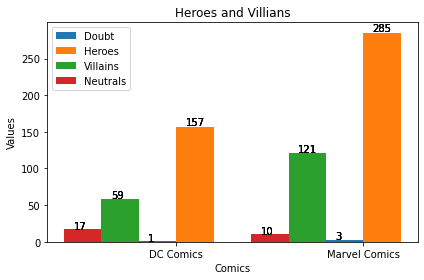

In [331]:
labels = list(q4_df.index)
doubt_data = list(q4_df['Doubt'])
hero_data = list(q4_df['Hero'])
villain_data = list(q4_df['Villain'])
neutral_data = list(q4_df['neutral'])

x=np.arange(len(labels))
width=0.2

fig, ax = plt.subplots()
doubt_bar = ax.bar(x-width/2, doubt_data, width, label = 'Doubt')
hero_bar = ax.bar(x+width/2, hero_data, width, label = 'Heroes')
villian_bar = ax.bar(x-3*(width/2), villain_data, width, label = 'Villains')
neutral_bar = ax.bar(x-5*(width/2), neutral_data, width, label = 'Neutrals')

ax.set_title('Heroes and Villians')
ax.set_xlabel('Comics')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bar):
  width=0.2
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x()+0.05, p.get_height()*1.01))

autolabel(doubt_bar)
autolabel(hero_bar)
autolabel(villian_bar)
autolabel(neutral_bar)

fig.tight_layout()
plt.show

## Q5. Realize a comparative between the character abilites of both comics.

**Step 1:** Use "Creator" and "super_powers"

In [332]:
q5_df = final_df.loc[:,['Creator','super_powers']]
q5_df

,Creator,super_powers
0,Marvel Comics,"[Agility, Super Strength, Stamina, Super Speed]"
1,Marvel Comics,"[Accelerated Healing, Durability, Longevity, S..."
2,DC Comics,[Lantern Power Ring]
3,Marvel Comics,"[Accelerated Healing, Intelligence, Super Stre..."
4,Marvel Comics,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...
648,Marvel Comics,"[Size Changing, Animal Oriented Powers]"
649,Marvel Comics,"[Flight, Energy Blasts, Size Changing]"
650,Marvel Comics,"[Cold Resistance, Durability, Longevity, Super..."
651,DC Comics,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


**Step 2:** Transform it in a long format

In [333]:
q5_df = q5_df.explode('super_powers')
q5_df

,Creator,super_powers
0,Marvel Comics,Agility
0,Marvel Comics,Super Strength
0,Marvel Comics,Stamina
0,Marvel Comics,Super Speed
1,Marvel Comics,Accelerated Healing
...,...,...
651,DC Comics,Weather Control
652,DC Comics,Super Speed
652,DC Comics,Intangibility
652,DC Comics,Time Travel


**Step 3:** Verify unique values of "Creator"

In [334]:
q5_df['Creator'].unique()

array(['Marvel Comics', 'DC Comics'], dtype=object)

**Step 4:** Count the values and reset the index

In [335]:
q5_df = q5_df.value_counts().reset_index()
q5_df

,Creator,super_powers,0
0,Marvel Comics,Super Strength,219
1,Marvel Comics,Durability,170
2,Marvel Comics,Stamina,165
3,Marvel Comics,Super Speed,152
4,Marvel Comics,Agility,140
...,...,...,...
288,DC Comics,Echolocation,1
289,DC Comics,Wind Control,1
290,Marvel Comics,Adaptation,1
291,Marvel Comics,Radar Sense,1


**Step 5:** Rename column 0 by 'Values'

In [336]:
q5_df.rename(columns={0:'Values'}, inplace = True)
q5_df

,Creator,super_powers,Values
0,Marvel Comics,Super Strength,219
1,Marvel Comics,Durability,170
2,Marvel Comics,Stamina,165
3,Marvel Comics,Super Speed,152
4,Marvel Comics,Agility,140
...,...,...,...
288,DC Comics,Echolocation,1
289,DC Comics,Wind Control,1
290,Marvel Comics,Adaptation,1
291,Marvel Comics,Radar Sense,1


**Step 6:** Filter by comics

In [337]:
q5_marvel = q5_df[(q5_df['Creator'] == 'Marvel Comics') & (q5_df['Values'] > np.median(q5_df['Values']))]
q5_dc = q5_df[(q5_df['Creator'] == 'DC Comics') & (q5_df['Values'] > np.median(q5_df['Values']))]

### Plot

**Step 5:** Plot

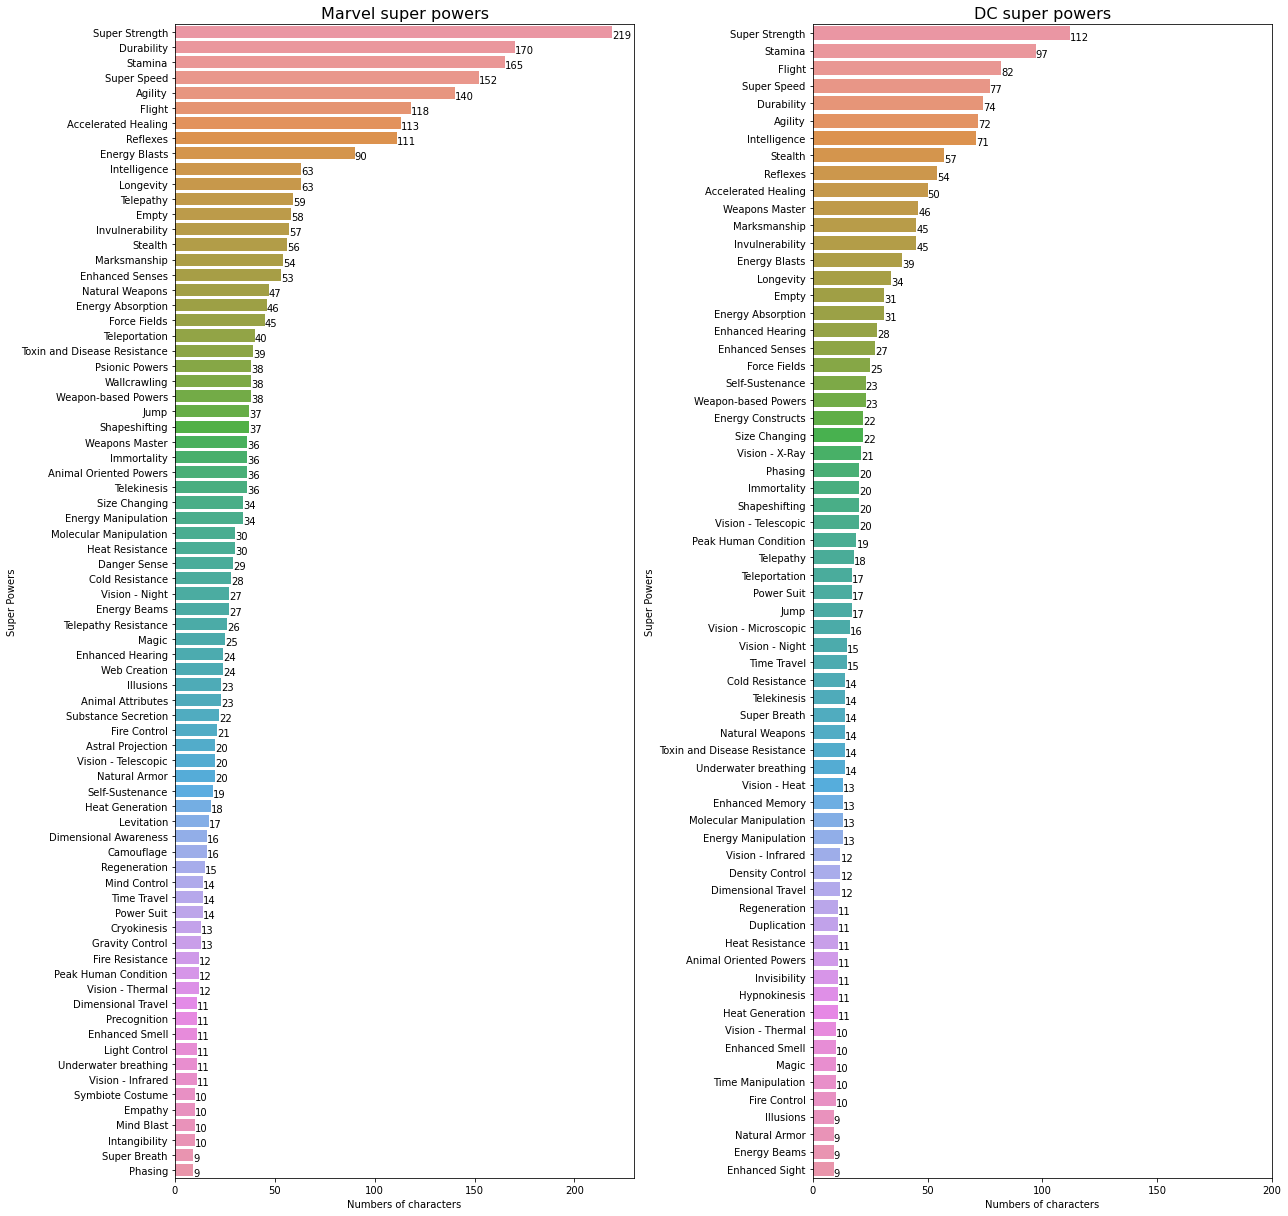

In [338]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,17)

# Marvel #
ax1_values = list(q5_marvel['Values'])
ax1_labels = list(q5_marvel['super_powers'])

sns.barplot(x = ax1_values, y = ax1_labels, ax = ax1, orient = 'h')
ax1.set_xticks(range(0,250,50))
ax1.set_title('Marvel super powers', fontsize = 16)


for text, rect in zip(ax1_values, ax1.patches):
  width, height = rect.get_width(), rect.get_height()
  x,y = rect.get_xy()
  ax1.text(x = x+width,
          y = y+height,
          s=text)

ax1.set_xlabel('Numbers of characters')
ax1.set_ylabel('Super Powers')
  
# DC #
ax2_values = list(q5_dc['Values'])
ax2_labels = list(q5_dc['super_powers'])

sns.barplot(x = ax2_values, y = ax2_labels, ax = ax2, orient = 'h')
ax2.set_xticks(range(0,250,50))
ax2.set_title('DC super powers', fontsize = 16)


for text_dc, rect_dc in zip(ax2_values, ax2.patches):
  width_dc, height_dc = rect_dc.get_width(), rect_dc.get_height()
  x_dc,y_dc = rect_dc.get_xy()
  ax2.text(x = x_dc + width_dc,
          y = y_dc + height_dc,
          s = text_dc)

ax2.set_xlabel('Numbers of characters')
ax2.set_ylabel('Super Powers')
      
fig.tight_layout()
plt.show()


## Q6. Who are the most intelligent characters?


**Step 1:** Use the next columns: "Name", "Creator" and "Intelligence".

In [339]:
q6_df = final_df.loc[:,['Name','Creator','Intelligence']]
q6_df

,Name,Creator,Intelligence
0,3-D Man,Marvel Comics,80.0
1,A-Bomb,Marvel Comics,75.0
2,Abin Sur,DC Comics,80.0
3,Abomination,Marvel Comics,85.0
4,Abraxas,Marvel Comics,100.0
...,...,...,...
648,Yellowjacket,Marvel Comics,95.0
649,Yellowjacket II,Marvel Comics,80.0
650,Ymir,Marvel Comics,80.0
651,Zatanna,DC Comics,95.0


**Step 2:** Separate by comics and filter with data > 4th quintil

In [340]:
# Quintil
q_val = [0,20,40,60,80,100]
quintiles = np.percentile(q6_df['Intelligence'], q = q_val)

q6_marvel = q6_df[(q6_df['Creator'] == 'Marvel Comics') & (q6_df['Intelligence'] > quintiles[4])]
q6_dc = q6_df[(q6_df['Creator'] == 'DC Comics') & (q6_df['Intelligence'] > quintiles[4])]

### Plot

**Step 3:** Plot

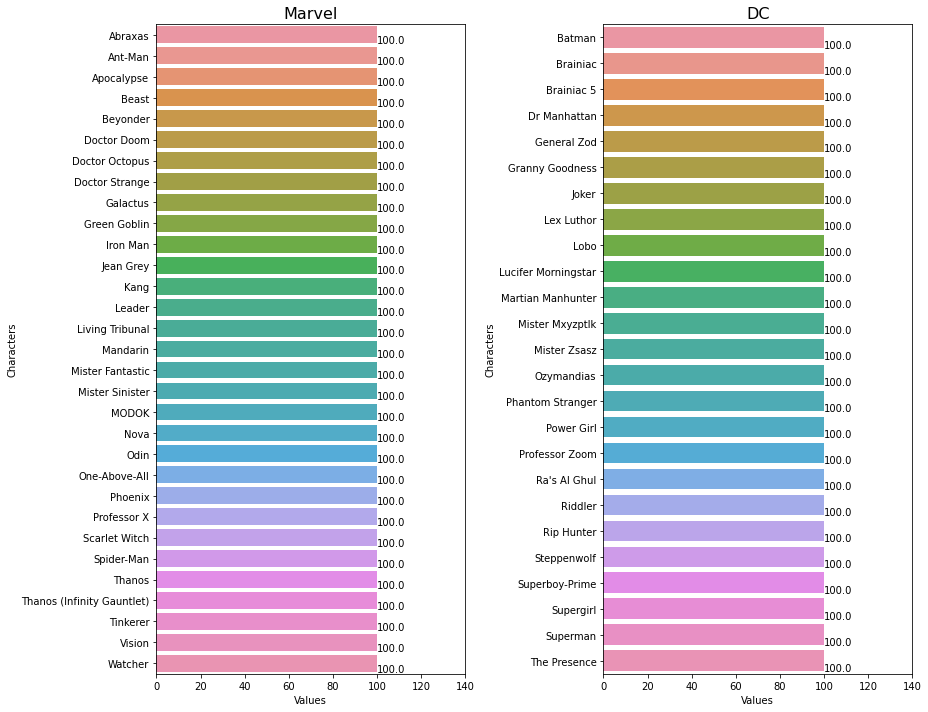

In [341]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(13,10)

def barplot(df,title,x_label,y_label,min_val,max_val,step,ax):
  ax_labels = list(df['Name'])
  ax_values = list(df['Intelligence'])
  sns.barplot(x = ax_values, y = ax_labels, ax = ax, orient='h')
  ax.set_xticks(range(min_val,max_val,step))
  ax.set_title(title, fontsize = 16)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

def autolabel(df,ax):
  ax_labels = list(df['Name'])
  ax_values = list(df['Intelligence'])
  for text, rect in zip(ax_values, ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x,y = rect.get_xy()
    ax.text(x = x+width,
            y = y+height,
            s=text)

# Marvel
barplot(q6_marvel,'Marvel','Values','Characters',0,150,20,ax1)
autolabel(q6_marvel,ax1)

# DC
barplot(q6_dc,'DC','Values','Characters',0,150,20,ax2)
autolabel(q6_dc,ax2)

fig.tight_layout()
plt.show()

This plot is not enough because there are lots of characters who have 100 points in "Intelligence" so we are going to campare between them with another graphic focus on their comics

**Step 4:** Use column "Creator" and "Intelligence"

In [342]:
q6_df = q6_df.loc[:,['Creator','Intelligence']]
q6_df

,Creator,Intelligence
0,Marvel Comics,80.0
1,Marvel Comics,75.0
2,DC Comics,80.0
3,Marvel Comics,85.0
4,Marvel Comics,100.0
...,...,...
648,Marvel Comics,95.0
649,Marvel Comics,80.0
650,Marvel Comics,80.0
651,DC Comics,95.0


**Step 5:** Check the value counts of intelligence and make it in a new dataframe

In [343]:
q6_df = q6_df.value_counts().reset_index()
q6_df

,Creator,Intelligence,0
0,Marvel Comics,85.0,145
1,Marvel Comics,80.0,82
2,Marvel Comics,90.0,61
3,DC Comics,85.0,57
4,DC Comics,95.0,45
5,DC Comics,80.0,40
6,Marvel Comics,75.0,36
7,Marvel Comics,100.0,34
8,Marvel Comics,95.0,33
9,DC Comics,90.0,32


**Step 5:** Rename 0 by 'Values'

In [344]:
q6_df.rename(columns={0:'Values'}, inplace = True)
q6_df

,Creator,Intelligence,Values
0,Marvel Comics,85.0,145
1,Marvel Comics,80.0,82
2,Marvel Comics,90.0,61
3,DC Comics,85.0,57
4,DC Comics,95.0,45
5,DC Comics,80.0,40
6,Marvel Comics,75.0,36
7,Marvel Comics,100.0,34
8,Marvel Comics,95.0,33
9,DC Comics,90.0,32


**Step 5:** Create a Pivot table to make the plot easier.

In [345]:
q6_pivot = q6_df.pivot_table(index = 'Creator', columns = 'Intelligence', values = 'Values')
q6_pivot

Intelligence,35.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0,90.0,95.0,100.0
Creator,,,,,,,,,,,,
DC Comics,NaN,NaN,3.0,1.0,3.0,5.0,22.0,40.0,57.0,32.0,45.0,26.0
Marvel Comics,1.0,2.0,NaN,5.0,12.0,8.0,36.0,82.0,145.0,61.0,33.0,34.0


**Step 6:** Replace Null values by 0.

In [346]:
q6_pivot = q6_pivot.fillna(0)
q6_pivot

Intelligence,35.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0,90.0,95.0,100.0
Creator,,,,,,,,,,,,
DC Comics,0.0,0.0,3.0,1.0,3.0,5.0,22.0,40.0,57.0,32.0,45.0,26.0
Marvel Comics,1.0,2.0,0.0,5.0,12.0,8.0,36.0,82.0,145.0,61.0,33.0,34.0


### Plot 2

**Step 6:** Plot

In [347]:
q6_pivot = q6_pivot.iloc[:,6:12]
q6_pivot

Intelligence,75.0,80.0,85.0,90.0,95.0,100.0
Creator,,,,,,
DC Comics,22.0,40.0,57.0,32.0,45.0,26.0
Marvel Comics,36.0,82.0,145.0,61.0,33.0,34.0


<function matplotlib.pyplot.show>

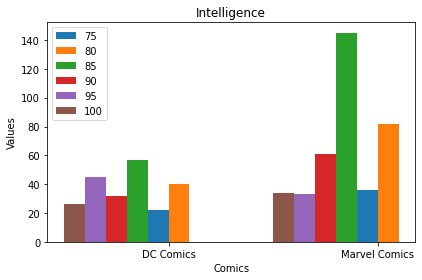

In [348]:
labels = list(q6_pivot.index)
data_75 = list(q6_pivot[75.0])
data_80 = list(q6_pivot[80.0])
data_85 = list(q6_pivot[85.0])
data_90 = list(q6_pivot[90.0])
data_95 = list(q6_pivot[95.0])
data_100 = list(q6_pivot[100.0])

x=np.arange(len(labels))
width=0.1

fig, ax = plt.subplots()
bar_75 = ax.bar(x-width/2, data_75, width, label = '75')
bar_80 = ax.bar(x+width/2, data_80, width, label = '80')
bar_85 = ax.bar(x-3*(width/2), data_85, width, label = '85')
bar_90 = ax.bar(x-5*(width/2), data_90, width, label = '90')
bar_95 = ax.bar(x-7*(width/2), data_95, width, label = '95')
bar_100 = ax.bar(x-9*(width/2), data_100, width, label = '100')


ax.set_title('Intelligence')
ax.set_xlabel('Comics')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show

## Q7. Who are the strongest characters?


**Step 1**: Use the next columns: "Name", "Creator" and "Intelligence".

In [349]:
q7_df = final_df.loc[:,['Name','Creator','Strength']]
q7_df

,Name,Creator,Strength
0,3-D Man,Marvel Comics,35.0
1,A-Bomb,Marvel Comics,100.0
2,Abin Sur,DC Comics,90.0
3,Abomination,Marvel Comics,80.0
4,Abraxas,Marvel Comics,100.0
...,...,...,...
648,Yellowjacket,Marvel Comics,10.0
649,Yellowjacket II,Marvel Comics,10.0
650,Ymir,Marvel Comics,100.0
651,Zatanna,DC Comics,10.0


Step 2: Separate by comics and filter with data > 4th quintil

In [369]:
# Quintiles
q_val = [0,20,40,60,80,100]
quintiles = np.percentile(q7_df['Strength'], q = q_val)

q7_marvel = q7_df[q7_df['Creator'] == 'Marvel Comics'].fillna(0)
q7_dc = q7_df[q7_df['Creator'] == 'DC Comics'].fillna(0)


### Plot

**Step 3:** Plot

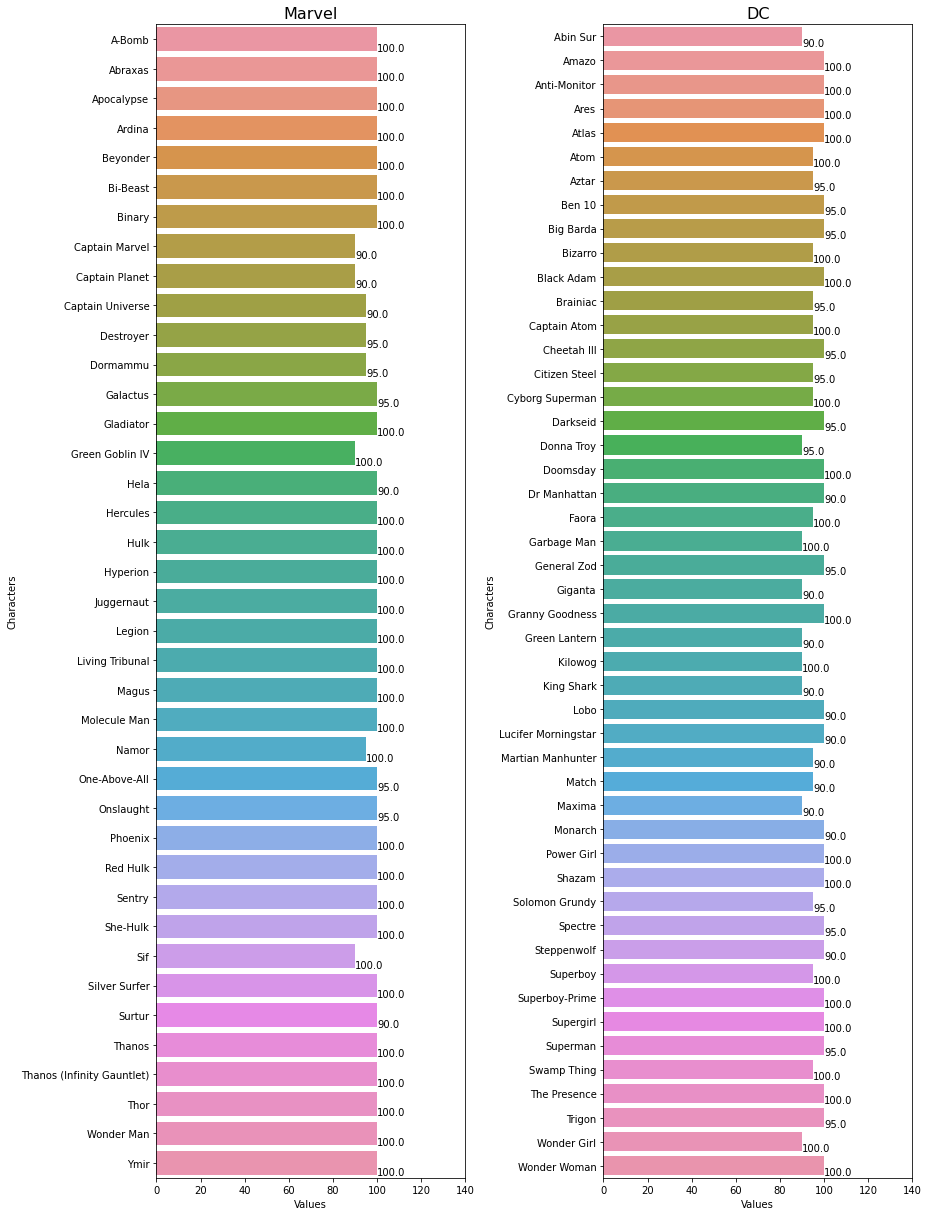

In [351]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(13,17)

def barplot(df,title,x_label,y_label,min_val,max_val,step,ax):
  ax_labels = list(df['Name'])
  ax_values = list(df['Strength'])
  sns.barplot(x = ax_values, y = ax_labels, ax = ax, orient='h')
  ax.set_xticks(range(min_val,max_val,step))
  ax.set_title(title, fontsize = 16)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

def autolabel(df,ax):
  ax_labels = list(df['Name'])
  ax_values = list(df['Strength'])
  for text, rect in zip(ax_values, ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x,y = rect.get_xy()
    ax.text(x = x+width,
            y = y+height,
            s=text)

# Marvel
barplot(q7_marvel,'Marvel','Values','Characters',0,150,20,ax1)
autolabel(q7_marvel,ax1)

# DC
barplot(q7_dc,'DC','Values','Characters',0,150,20,ax2)
autolabel(q7_dc,ax2)

fig.tight_layout()
plt.show()

This plot is not enough because there are lots of characters who have 100 points in "Strength" so we are going to campare between them with another graphic focus on their comics

### Plot 2

**Step 4:** Plot


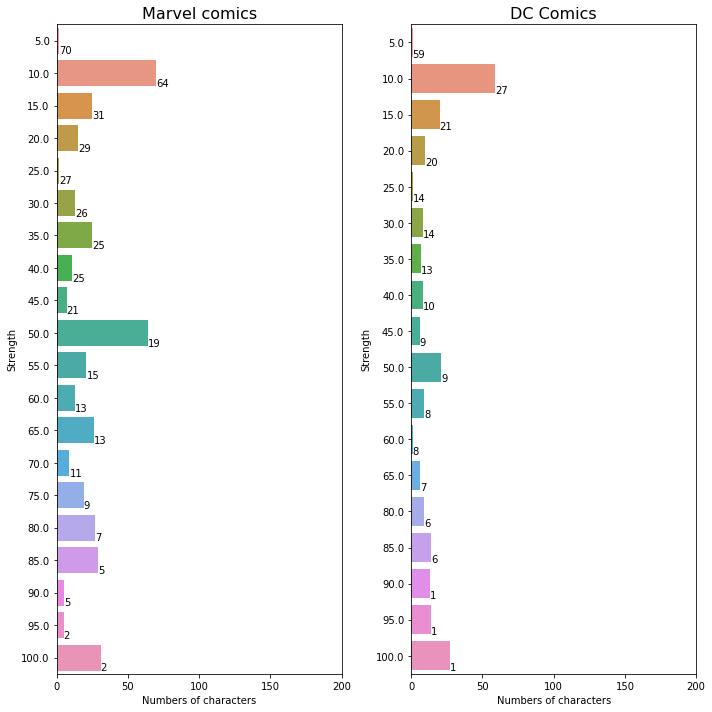

In [370]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(10,10)

# Marvel #
ax1_values = list(q7_marvel['Values'])
ax1_labels = list(q7_marvel['Strength'])

sns.barplot(x = ax1_values, y = ax1_labels, ax = ax1, orient = 'h')
ax1.set_xticks(range(0,250,50))
ax1.set_title('Marvel comics', fontsize = 16)


for text, rect in zip(ax1_values, ax1.patches):
  width, height = rect.get_width(), rect.get_height()
  x,y = rect.get_xy()
  ax1.text(x = x+width,
          y = y+height,
          s=text)

ax1.set_xlabel('Numbers of characters')
ax1.set_ylabel('Strength')
  
# DC #
ax2_values = list(q7_dc['Values'])
ax2_labels = list(q7_dc['Strength'])

sns.barplot(x = ax2_values, y = ax2_labels, ax = ax2, orient = 'h')
ax2.set_xticks(range(0,250,50))
ax2.set_title('DC Comics', fontsize = 16)


for text_dc, rect_dc in zip(ax2_values, ax2.patches):
  width_dc, height_dc = rect_dc.get_width(), rect_dc.get_height()
  x_dc,y_dc = rect_dc.get_xy()
  ax2.text(x = x_dc + width_dc,
          y = y_dc + height_dc,
          s = text_dc)

ax2.set_xlabel('Numbers of characters')
ax2.set_ylabel('Strength')
      
fig.tight_layout()
plt.show()

We can see that Marvel Comics have strong characters than DC.

## Q8. Who are the fastest characters?


### Plot

## Q9. Who are the characters with more power?


### Plot

## Q10. What superpowers predominate in the characters of DC Comics and Marvel Comics?

### Plot